In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns


#Reading data
data_raw = pd.read_csv('/content/QDA_P.csv')
data_raw.head()
data_raw.describe()

FileNotFoundError: [Errno 2] No such file or directory: '/content/QDA_P.csv'

In [ ]:
!pip install --upgrade openpyxl


In [ ]:
print(data_raw.columns)


Index(['Image name;Position;Region type;ID;Area [pixels];Perimeter [pixels];Eccentricity;Orientation [radians];Solidity;Extent;Major Axis Length [pixels];Minor Axis Length [pixels];Equivalent Diameter [pixels]'], dtype='object')


In [ ]:
if all(col in data_raw.columns for col in ['Image name', 'Position', 'Region type']):
    data = data_raw.groupby(['Image name', 'Position', 'Region type'], as_index=False).mean()
    print(len(data))
    print(data.head(10))
else:
    print("One or more columns are missing from the DataFrame.")


One or more columns are missing from the DataFrame.


In [ ]:
import pandas as pd

# Example DataFrame
data_raw = pd.DataFrame({
    'Image name': ['img1', 'img1', 'img2', 'img2'],
    'Position': ['pos1', 'pos2', 'pos1', 'pos2'],
    'Region type': ['type1', 'type1', 'type2', 'type2'],
    'Value': [1, 2, 3, 4]
})

# Check and clean column names
data_raw.columns = data_raw.columns.str.strip()
print("Columns after stripping:", data_raw.columns)

# Check if all required columns are present
required_columns = ['Image name', 'Position', 'Region type']
missing_columns = [col for col in required_columns if col not in data_raw.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Group by the specified columns and compute the mean
    data = data_raw.groupby(['Image name', 'Position', 'Region type'], as_index=False).mean()
    print(f"Number of rows after grouping: {len(data)}")
    print(data.head(10))


Columns after stripping: Index(['Image name', 'Position', 'Region type', 'Value'], dtype='object')
Number of rows after grouping: 4
  Image name Position Region type  Value
0       img1     pos1       type1    1.0
1       img1     pos2       type1    2.0
2       img2     pos1       type2    3.0
3       img2     pos2       type2    4.0


In [ ]:
data = data_raw.groupby(['Image name','Position','Region type'],as_index=False).mean()
print(len(data))
data.head(10)

4


,Image name,Position,Region type,Value
0,img1,pos1,type1,1.0
1,img1,pos2,type1,2.0
2,img2,pos1,type2,3.0
3,img2,pos2,type2,4.0


In [ ]:
#Standardization of data
data_std = (data- data.mean()) / data.std()
data_std.describe()
data_std.head()

,Orientation
0,-0.833605
1,1.058192
2,1.069178
3,0.915373
4,1.319660


Number of points n = 1800
Mean = 0.88


<ipython-input-72-54053ad6e211>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Mean = %.2f'% mean) #mean of the points


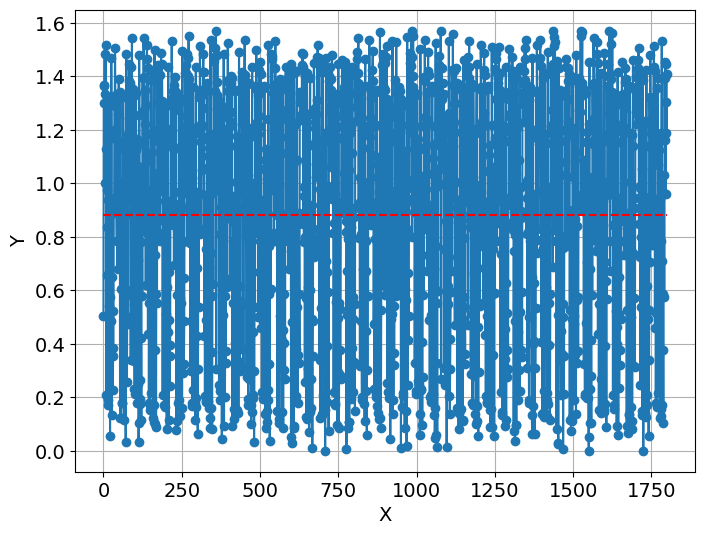

In [ ]:
n=len(data)
print("Number of points n = %d" % n) #number of points

mean = data.mean()
print('Mean = %.2f'% mean) #mean of the points

# Let's plot the data first
plt.plot(data, 'o-')
plt.hlines(mean, 0, n, colors='r', linestyles='dashed')
plt.xlabel('X')
plt.ylabel('Y')

plt.grid()
plt.show()

In [ ]:
# Get the number of points above the mean
m = np.sum(data > mean) #.values[0]
print('Number of points above the mean, m = %d' % m)

Number of points above the mean, m = 1010


<ipython-input-73-8d43c427467d>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Number of points above the mean, m = %d' % m)


In [ ]:
# Get the number of points above the mean using the count function
m = data[data > mean].count()
print('Number of points above the mean, m = %d' % m)

Number of points above the mean, m = 1010


<ipython-input-74-b84fc8c2b3b8>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Number of points above the mean, m = %d' % m)


In [ ]:
# Create a new series with the mean subtracted from the original series
new_series = np.array(data - mean).flatten()
print('new_series = ', new_series)
# Create a new series with the sign of the new series
new_series_sign = np.sign(new_series)
# This series will be 1 when the new series is positive and -1 when it is negative
print('new_series_sign = ', new_series_sign)

new_series =  [-0.37939278  0.48160722  0.48660722 ...  0.42060722  0.30660722
  0.52760722]
new_series_sign =  [-1.  1.  1. ...  1.  1.  1.]


In [ ]:
# Compute the difference between consecutive elements of the new series
new_series_sign_diff = np.diff(new_series_sign)
# This series will be 0 when the sign doesn't change
print('new_series_sign_diff = ', new_series_sign_diff)

new_series_sign_diff =  [2. 0. 0. ... 0. 0. 0.]


In [ ]:
# Count the number of runs
runs = (np.sum(new_series_sign_diff != 0) + 1)
print('Number of runs = %d' % runs) #number of runs

Number of runs = 760


In [ ]:
#Expected number of runs
exp_runs= 2*m*(n-m)/n +1
print('Expected number of runs = %3f' % exp_runs)

Expected number of runs = 887.555556


<ipython-input-78-ee7e9ad87d24>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Expected number of runs = %3f' % exp_runs)


In [ ]:
#now time for other tests
from statsmodels.sandbox.stats.runs import runstest_1samp
stat_runs, pval_runs = runstest_1samp(data['Orientation'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value={:.3f}'.format(pval_runs))
alfa=0.05
if pval_runs < alfa:
    print('Reject H0: the data are not random')
else:
    print('Accept H0: the data are random')

Runs test statistic = -6.106
Runs test p-value=0.000
Reject H0: the data are not random


In [ ]:
stat_shapiro, p_shapiro = scipy.stats.shapiro(data[0])
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro, p_shapiro))
# interpret
alpha = 0.05
if p_shapiro > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')


# Plot the qqplot
stats.probplot(data[0], dist="norm", plot=plt)
plt.show()

NameError: name 'scipy' is not defined

In [ ]:
from statsmodels.tsa.stattools import acf
#autocorrelation function
[acf_value, lbq, _] = acf(batch_data, nlags = int(len(batch_data)/3), qstat=True)

#Bartlett's test at lag 1
lag_test=1
rk=abs(acf_value[lag_test])
alpha = 0.05 # significance level
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(len(batch_data))))

if rk>z_alpha2/np.sqrt(len(batch_data)):
    print('The null hypothesis is rejected')
else:
    print('The null hypothesis is accepted')

NameError: name 'batch_data' is not defined

In [ ]:
#rechecking  randomness

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the library for hypothesis testing scipy
import scipy.stats as stats

# Import the dataset
data = pd.read_csv('/content/ESE3_ex1.csv')

data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/ESE3_ex1.csv'

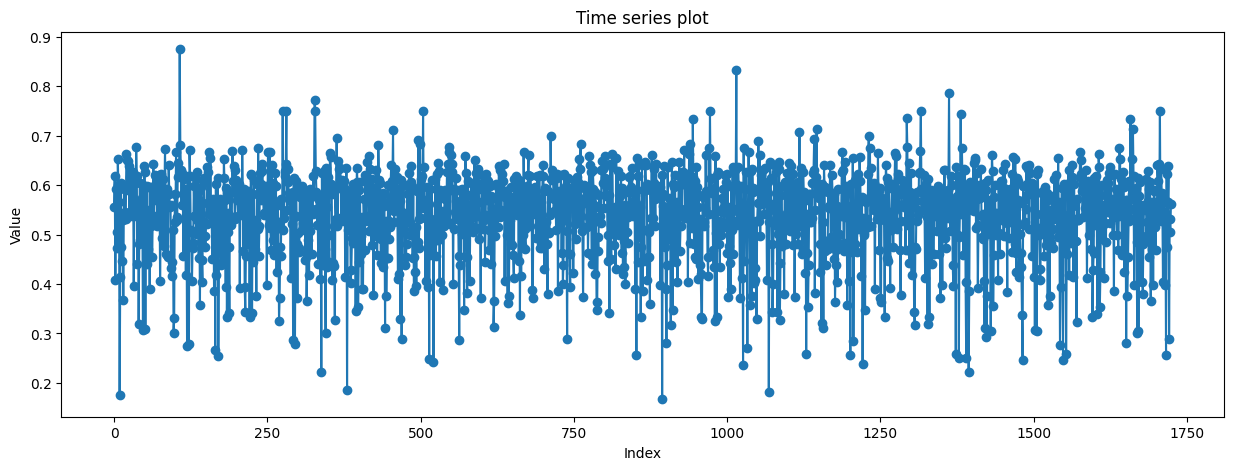

In [ ]:
#Time series plot
plt.figure(figsize=(15, 5))
plt.plot(data, 'o-')
plt.title('Time series plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [ ]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

stat_runs, pval_runs = runstest_1samp(data['Extent'], correction=False)
print('Runs test statistic = {:,.3f}'.format(stat_runs))
print('Runs test p-value = {:,.3f}'.format(pval_runs))
alfa=0.05
if pval_runs < alfa:
    print('Reject H0: the data are not random')
else:
    print('Accept H0: the data are random')


Runs test statistic = 0.889
Runs test p-value = 0.374
Accept H0: the data are random


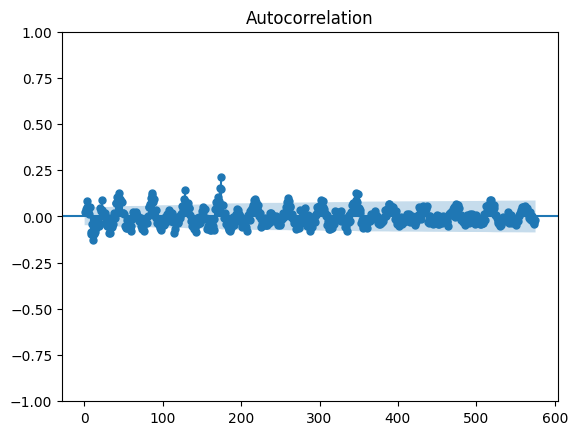

In [ ]:
# Plot the acf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(data['Extent'], lags = int(len(data)/3), zero=False)
plt.show()

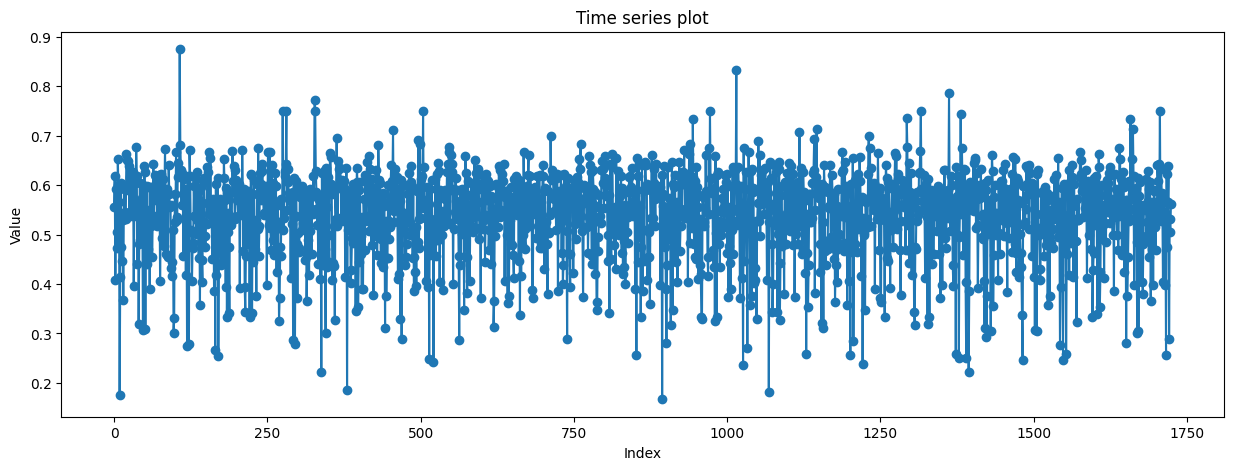

In [ ]:
#Time series plot
plt.figure(figsize=(15, 5))
plt.plot(data, 'o-')
plt.title('Time series plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


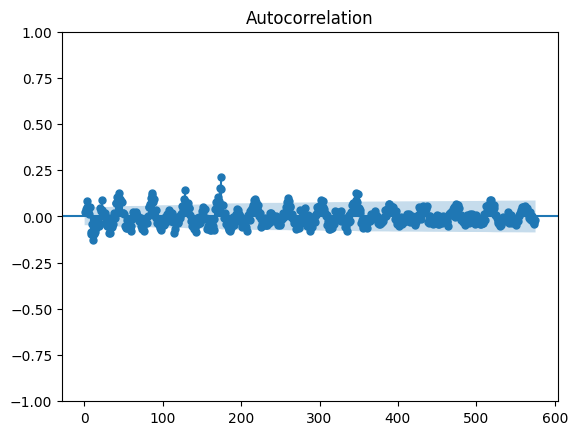

In [ ]:
# Plot the acf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(data['Extent'], lags = int(len(data)/3), zero=False)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import acf

n = len(data)

#autocorrelation function
[acf_values, lbq, _] = acf(data, nlags = int(np.sqrt(n)), qstat=True, fft = False)

#Bartlett's test at lag 1
alpha = 0.05
lag_test = 1
rk = acf_values[lag_test]
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(n)))

if rk>z_alpha2/np.sqrt(n):
    print('The null hypothesis is rejected')
else: print('The null hypothesis is accepted')

Test statistic rk = 0.021878
Rejection region starts at 0.047190
The null hypothesis is accepted


In [ ]:
#LBQ test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox

lag_test = 4
lbq_test = acorr_ljungbox(data, lags=[lag_test], return_df=True)
print('LBQ test statistic at lag %d = %f' % (lag_test, lbq_test.loc[lag_test,'lb_stat']))
print('LBQ test p-value at lag %d = %f' % (lag_test, lbq_test.loc[lag_test,'lb_pvalue']))

LBQ test statistic at lag 4 = 20.519032
LBQ test p-value at lag 4 = 0.000394


In [ ]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns


# Import the library for hypothesis testing scipy
import scipy.stats as stats

# Import the dataset
data = pd.read_csv('ESE3_ex1.csv')

data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ESE3_ex1.csv'

In [ ]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns


# Import the library for hypothesis testing scipy
import scipy.stats as stats

# Import the dataset
data_raw = pd.read_csv('/content/image_statistics.csv')

data_raw.head()

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels]
0,2024-05-22_17-09-23-718_MV540-H@EOaAFjS1zEFNUI...,top_left,part,0,39366,4039.809,0.123,-0.983,0.770,0.728,278.420,276.300,223.880
1,2024-05-22_17-09-23-718_MV540-H@EOaAFjS1zEFNUI...,top_left,void,1,72,34.556,0.800,-1.342,0.857,0.571,13.095,7.860,9.575
2,2024-05-22_17-09-23-718_MV540-H@EOaAFjS1zEFNUI...,top_left,void,2,85,42.728,0.948,-1.365,0.859,0.531,19.283,6.157,10.403
3,2024-05-22_17-09-23-718_MV540-H@EOaAFjS1zEFNUI...,top_left,void,3,194,71.320,0.958,-1.327,0.882,0.452,30.902,8.900,15.717
4,2024-05-22_17-09-23-718_MV540-H@EOaAFjS1zEFNUI...,top_left,void,4,197,63.420,0.890,-1.507,0.904,0.561,24.933,11.367,15.838


In [ ]:
data_raw.columns

Index(['Image name', 'Position', 'Region type', 'ID', 'Area [pixels]',
       'Perimeter [pixels]', 'Eccentricity', 'Orientation [radians]',
       'Solidity', 'Extent', 'Major Axis Length [pixels]',
       'Minor Axis Length [pixels]', 'Equivalent Diameter [pixels]'],
      dtype='object')

In [ ]:
# Select rows where 'Region type' is 'void'
data_tr = data_raw.loc[data_raw['Region type'] == 'void']

# Select rows where 'Region type' is 'part'
data_part = data_raw.loc[data_raw['Region type'] == 'part']

In [ ]:
data = data_tr.groupby(['Image name','Position','Region type'],as_index=False).mean()
print(len(data))
data.head(10)

40


,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels]
0,2024-05-22_17-09-23-718_MV540-H@EOaAFjS1zEFNUI...,bottom_left,void,21.5,288.095238,72.112857,0.820476,0.069714,0.911690,0.533571,27.314238,14.097381,18.238286
1,2024-05-22_17-09-23-718_MV540-H@EOaAFjS1zEFNUI...,bottom_right,void,22.5,266.363636,67.085227,0.844591,0.096159,0.901045,0.531409,25.875205,12.970955,17.010045
2,2024-05-22_17-09-23-718_MV540-H@EOaAFjS1zEFNUI...,top_left,void,21.0,278.073171,70.713585,0.815024,0.027976,0.913439,0.543146,26.754122,13.933415,17.963512
3,2024-05-22_17-09-23-718_MV540-H@EOaAFjS1zEFNUI...,top_right,void,23.0,254.377778,65.317089,0.847644,0.155689,0.903089,0.522311,25.325956,12.534467,16.497556
4,2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...,bottom_left,void,21.5,283.357143,71.370571,0.795667,0.146381,0.922833,0.548000,26.924857,13.921738,18.028976
5,2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...,bottom_right,void,23.0,254.866667,63.923200,0.833222,0.078622,0.912044,0.555778,24.816511,12.382956,16.350578
6,2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...,top_left,void,21.5,274.761905,69.630500,0.797643,0.122857,0.916881,0.547429,26.441976,13.668095,17.639762
7,2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...,top_right,void,24.0,244.510638,63.193617,0.855064,0.129574,0.907702,0.550766,24.633447,12.142149,16.094489
8,2024-05-22_17-12-18-952_MV540-H@EOaAFjS1zEFNUI...,bottom_left,void,22.0,273.790698,69.012953,0.823930,0.204535,0.924651,0.557535,26.240674,13.526605,17.556302
9,2024-05-22_17-12-18-952_MV540-H@EOaAFjS1zEFNUI...,bottom_right,void,24.0,252.340426,63.470298,0.794447,0.037872,0.908043,0.554957,24.563234,12.178809,16.100766


In [ ]:
print(data_raw.dtypes)


Image name                       object
Position                         object
Region type                      object
ID                                int64
Area [pixels]                     int64
Perimeter [pixels]              float64
Eccentricity                    float64
Orientation [radians]           float64
Solidity                        float64
Extent                          float64
Major Axis Length [pixels]      float64
Minor Axis Length [pixels]      float64
Equivalent Diameter [pixels]    float64
dtype: object


In [ ]:
#Remove variables that are not useful
data1 = data[['Area [pixels]', 'Perimeter [pixels]', 'Eccentricity', 'Solidity', 'Extent','Major Axis Length [pixels]', 'Minor Axis Length [pixels]', 'Equivalent Diameter [pixels]']]
data1.head()

,Area [pixels],Perimeter [pixels],Eccentricity,Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels]
0,288.095238,72.112857,0.820476,0.911690,0.533571,27.314238,14.097381,18.238286
1,266.363636,67.085227,0.844591,0.901045,0.531409,25.875205,12.970955,17.010045
2,278.073171,70.713585,0.815024,0.913439,0.543146,26.754122,13.933415,17.963512
3,254.377778,65.317089,0.847644,0.903089,0.522311,25.325956,12.534467,16.497556
4,283.357143,71.370571,0.795667,0.922833,0.548000,26.924857,13.921738,18.028976


In [ ]:
#Standardization of data void
data_std = (data1 - data1.mean()) / data1.std()
data_std.describe()
data_std.head()

,Area [pixels],Perimeter [pixels],Eccentricity,Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels]
0,0.872653,1.111773,-0.297495,0.219271,-0.421673,0.996638,1.182474,1.156466
1,-0.260913,-0.264763,0.746685,-0.966361,-0.561976,-0.271528,-0.212621,-0.238783
2,0.349881,0.728661,-0.533561,0.414022,0.199592,0.503029,0.979400,0.844331
3,-0.886120,-0.748869,0.878904,-0.738766,-1.152295,-0.755560,-0.753217,-0.820959
4,0.625504,0.908539,-1.371760,1.460351,0.514520,0.653491,0.964938,0.918696


In [ ]:
#Remove variables that are not useful part
data2 = data_part[['Area [pixels]', 'Perimeter [pixels]', 'Eccentricity', 'Solidity', 'Extent','Major Axis Length [pixels]', 'Minor Axis Length [pixels]', 'Equivalent Diameter [pixels]']]
data2.head()

,Area [pixels],Perimeter [pixels],Eccentricity,Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels]
0,39366,4039.809,0.123,0.770,0.728,278.420,276.300,223.880
42,38855,4188.159,0.099,0.756,0.686,279.832,278.444,222.422
85,38971,4130.904,0.279,0.762,0.685,281.858,270.645,222.754
131,38764,4118.277,0.120,0.764,0.742,278.480,276.477,222.162
176,39352,4075.147,0.200,0.767,0.686,280.285,274.623,223.840


In [ ]:
#Standardization of data part
data_std2 = (data2 - data2.mean()) / data2.std()
data2.describe()
data2.head()

,Area [pixels],Perimeter [pixels],Eccentricity,Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels]
0,39366,4039.809,0.123,0.770,0.728,278.420,276.300,223.880
42,38855,4188.159,0.099,0.756,0.686,279.832,278.444,222.422
85,38971,4130.904,0.279,0.762,0.685,281.858,270.645,222.754
131,38764,4118.277,0.120,0.764,0.742,278.480,276.477,222.162
176,39352,4075.147,0.200,0.767,0.686,280.285,274.623,223.840


In [ ]:
data_std2 = data_std2.reset_index(drop=True, inplace=False)
data_std2.head()

,Area [pixels],Perimeter [pixels],Eccentricity,Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels]
0,1.380601,-1.771155,-0.036010,1.321721,0.594168,-0.660780,-0.401076,1.374567
1,0.462088,-0.019268,-0.621935,-0.107167,-1.451329,0.324641,0.922215,0.463728
2,0.670595,-0.695401,3.772501,0.505214,-1.500032,1.738568,-3.891380,0.671135
3,0.298517,-0.844515,-0.109251,0.709341,1.276001,-0.618907,-0.291831,0.301302
4,1.355436,-1.353843,1.843832,1.015531,-1.451329,0.640786,-1.436132,1.349578


Text(0.5, 1.0, 'Minor Axis Length [pixels]')

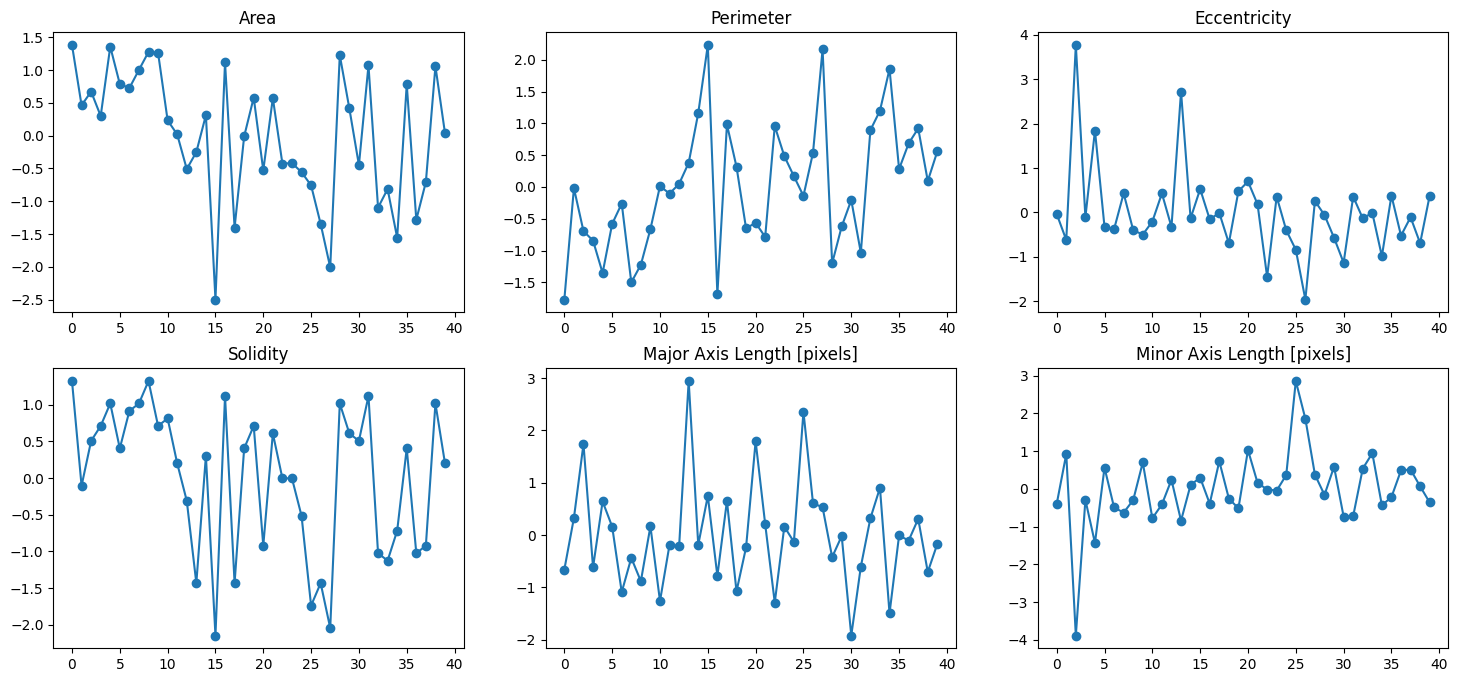

In [ ]:
#Plot the data part
fig, ax = plt.subplots(2, 3, figsize = (18, 8))
ax[0,0].plot(data_std2 ['Area [pixels]'], 'o-')
ax[0,0].set_title('Area')
ax[0,1].plot(data_std2 ['Perimeter [pixels]'], 'o-')
ax[0,1].set_title('Perimeter')
ax[0,2].plot(data_std2 ['Eccentricity'], 'o-')
ax[0,2].set_title('Eccentricity')
ax[1,0].plot(data_std2 ['Solidity'], 'o-')
ax[1,0].set_title('Solidity')
ax[1,1].plot(data_std2 ['Major Axis Length [pixels]'], 'o-')
ax[1,1].set_title('Major Axis Length [pixels]')
ax[1,2].plot(data_std2 ['Minor Axis Length [pixels]'], 'o-')
ax[1,2].set_title('Minor Axis Length [pixels]')

Text(0.5, 1.0, 'Minor Axis Length [pixels]')

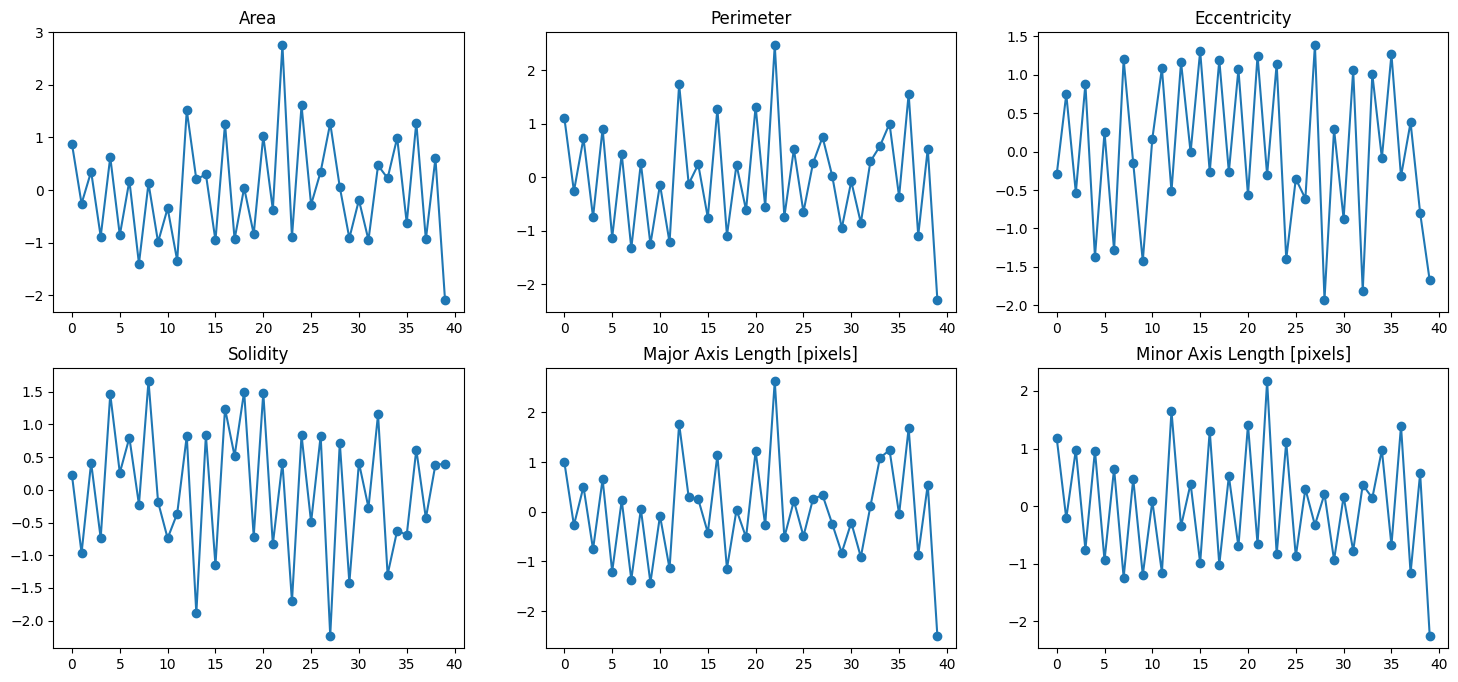

In [ ]:
#Plot the data void
fig, ax = plt.subplots(2, 3, figsize = (18, 8))
ax[0,0].plot(data_std ['Area [pixels]'], 'o-')
ax[0,0].set_title('Area')
ax[0,1].plot(data_std ['Perimeter [pixels]'], 'o-')
ax[0,1].set_title('Perimeter')
ax[0,2].plot(data_std ['Eccentricity'], 'o-')
ax[0,2].set_title('Eccentricity')
ax[1,0].plot(data_std ['Solidity'], 'o-')
ax[1,0].set_title('Solidity')
ax[1,1].plot(data_std ['Major Axis Length [pixels]'], 'o-')
ax[1,1].set_title('Major Axis Length [pixels]')
ax[1,2].plot(data_std ['Minor Axis Length [pixels]'], 'o-')
ax[1,2].set_title('Minor Axis Length [pixels]')

In [ ]:
#************************************i did change until here******************************
#changes were seperate the void and part region, and plotting seperatly
#do we need randmness test as we do not have the order of the sample?

In [ ]:
#Runs test
from statsmodels.sandbox.stats.runs import runstest_1samp
print("Area")
stat_runs, pval_runs = runstest_1samp(data1['Area [pixels]'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))
alfa=0.05
if pval_runs < alfa:
    print('Reject H0: the data are not random\n')
else:
    print('Accept H0: the data are random\n')

print("Perimeter")
stat_runs, pval_runs = runstest_1samp(data1['Perimeter [pixels]'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))
alfa=0.05
if pval_runs < alfa:
    print('Reject H0: the data are not random\n')
else:
    print('Accept H0: the data are random\n')

print("Eccentricity")
stat_runs, pval_runs = runstest_1samp(data1['Eccentricity'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))
alfa=0.05
if pval_runs < alfa:
    print('Reject H0: the data are not random\n')
else:
    print('Accept H0: the data are random\n')

print("Solidity")
stat_runs, pval_runs = runstest_1samp(data1['Solidity'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))
alfa=0.05
if pval_runs < alfa:
    print('Reject H0: the data are not random\n')
else:
    print('Accept H0: the data are random\n')

print("Major axis")
stat_runs, pval_runs = runstest_1samp(data1['Major Axis Length [pixels]'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))
alfa=0.05
if pval_runs < alfa:
    print('Reject H0: the data are not random\n')
else:
    print('Accept H0: the data are random\n')

print("Minor Axis")
stat_runs, pval_runs = runstest_1samp(data1['Minor Axis Length [pixels]'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))
alfa=0.05
if pval_runs < alfa:
    print('Reject H0: the data are not random\n')
else:
    print('Accept H0: the data are random\n')


Area
Runs test statistic = 2.907
Runs test p-value = 0.004
Reject H0: the data are not random

Perimeter
Runs test statistic = 3.524
Runs test p-value = 0.000
Reject H0: the data are not random

Eccentricity
Runs test statistic = 4.596
Runs test p-value = 0.000
Reject H0: the data are not random

Solidity
Runs test statistic = 3.228
Runs test p-value = 0.001
Reject H0: the data are not random

Major axis
Runs test statistic = 2.883
Runs test p-value = 0.004
Reject H0: the data are not random

Minor Axis
Runs test statistic = 5.476
Runs test p-value = 0.000
Reject H0: the data are not random



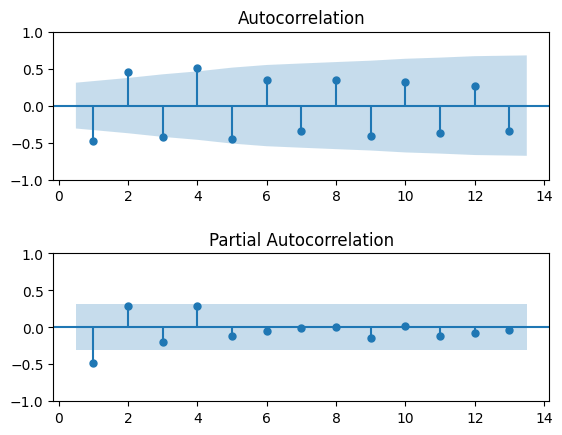

In [ ]:
#Check ACF and PACF of Eccentricity

import statsmodels.graphics.tsaplots as sgt
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data_std['Eccentricity'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data_std['Eccentricity'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

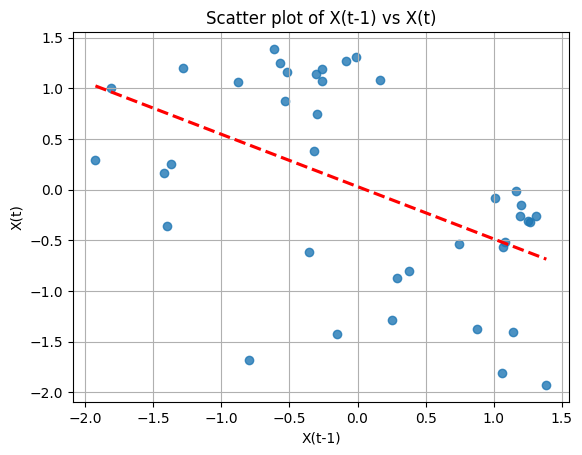

In [ ]:
data_std['lag1'] = data_std['Eccentricity'].shift(1)
sns.regplot(x=data_std['lag1'], y=data_std['Eccentricity'], ci=None, line_kws={'color':'red', 'ls':'--'})
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.xlabel('X(t-1)')
plt.ylabel('X(t)')
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.grid()

In [ ]:
from statsmodels.tsa.stattools import acf

n = len(data_std['lag1'][1:])

#autocorrelation function
[acf_values, lbq, _] = acf(data_std['lag1'][1:], nlags = int(np.sqrt(n)), qstat=True, fft = False)

#Bartlett's test at lag 1
alpha = 0.05
lag_test = 1
rk = acf_values[lag_test]
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(n)))

Test statistic rk = -0.555720
Rejection region starts at 0.313845


Shapiro-Wilk test p-value = 0.018


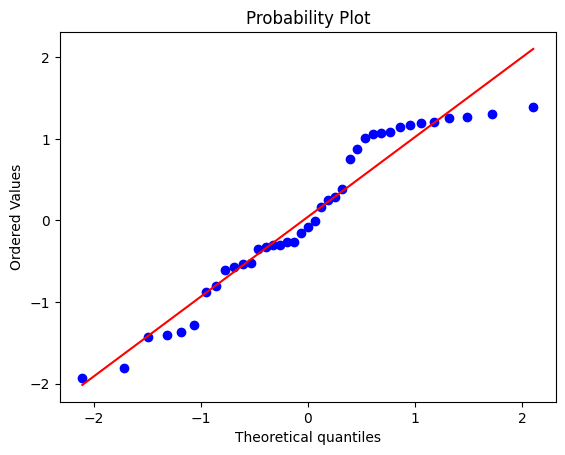

In [ ]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data_std['lag1'][1:])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data_std['lag1'][1:], dist="norm", plot=plt)
plt.show()

In [ ]:
!pip install qda

In [ ]:
#ARIMA model (1,1,1) import the necessary library
!pip install qda
import qda
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

x = data['Eccentricity']
model = qda.ARIMA(x, order=(1,1,1), add_constant=True)

qda.ARIMAsummary(model)

ModuleNotFoundError: No module named 'qda'

In [ ]:
#ARIMA model (1,1,1) without the constant

x = data['Eccentricity']
model = qda.ARIMA(x, order=(1,1,1), add_constant=False)

qda.ARIMAsummary(model)

In [ ]:
#we observe that p value of LBQ are all higher than 5%, meaning we do not expect to see any kind of autocorrelation on the residuals

#Extract the residuals
residuals_area = model.resid[1:]

# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals_area)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(residuals_area, dist="norm", plot=plt)
plt.show()

NameError: name 'model' is not defined

In [ ]:
#Remove outliers and check normality again
data_out_area = residuals_area.drop(index=2)

#Shapiro-Wilk test
from scipy.stats import shapiro
stat_shapiro_out, p_shapiro_out = shapiro(data_out_area)
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro_out, p_shapiro_out))

#Interpretation
alpha = 0.05
if p_shapiro_out > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')

#Plot the qqplot
stats.probplot(data_out_area, dist="norm", plot=plt)
plt.show()

NameError: name 'residuals_area' is not defined

In [ ]:
#Data are normal FINALLYYY !!!

In [ ]:
#Plot ACF and PACF
import statsmodels.graphics.tsaplots as sgt
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data_out_area, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data_out_area, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
#Test lag 6
n = len(data_out_area)

#Autocorrelation function
[acf_values, lbq, _] = acf(data_out_area, nlags = int(np.sqrt(n)), qstat=True, fft = False)

#Bartlett's test at lag 6
alpha = 0.05
lag_test = 6
rk = acf_values[lag_test]
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(n)))

if rk>z_alpha2/np.sqrt(n):
    print('The null hypothesis is rejected')
else: print('The null hypothesis is accepted')

NameError: name 'data_out_area' is not defined

In [ ]:
Residuals_area = data_out_area

NameError: name 'data_out_area' is not defined

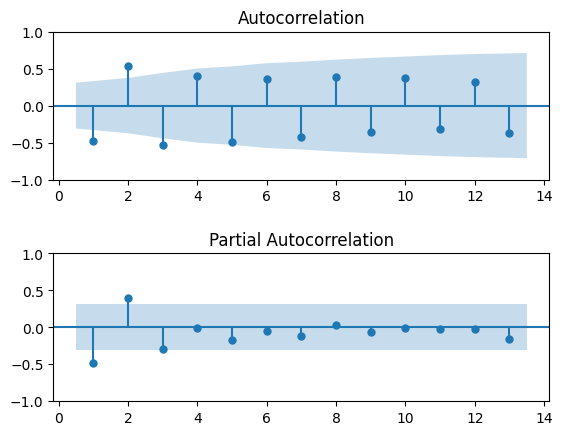

In [ ]:
#Check ACF and PACF of Perimeter [pixels]
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data_std['Perimeter [pixels]'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data_std['Perimeter [pixels]'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

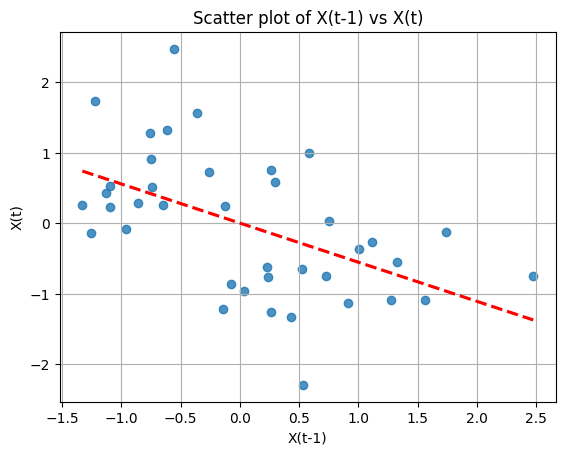

In [ ]:
#Apply difference operator
data_std['lag1'] = data_std['Perimeter [pixels]'].shift(1)
sns.regplot(x=data_std['lag1'], y=data_std['Perimeter [pixels]'], ci=None, line_kws={'color':'red', 'ls':'--'})
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.xlabel('X(t-1)')
plt.ylabel('X(t)')
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.grid()

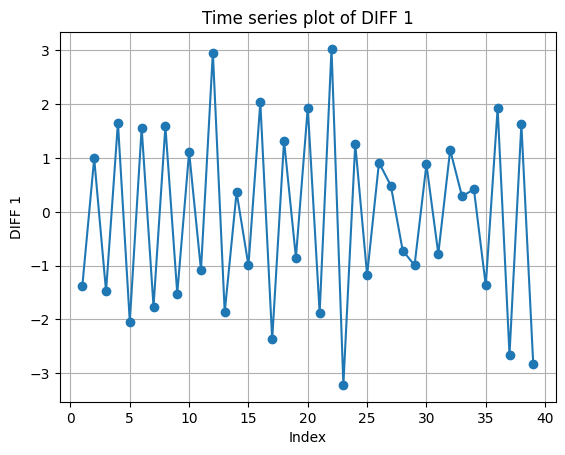

In [ ]:
#calculate the difference between the data and the lag1
data_std['diff1'] = data_std['Perimeter [pixels]'] - data_std['lag1']
plt.plot(data_std['diff1'], 'o-')
plt.xlabel('Index')
plt.ylabel('DIFF 1')
plt.title('Time series plot of DIFF 1')
plt.grid()
plt.show()

Runs test p-value = 0.000


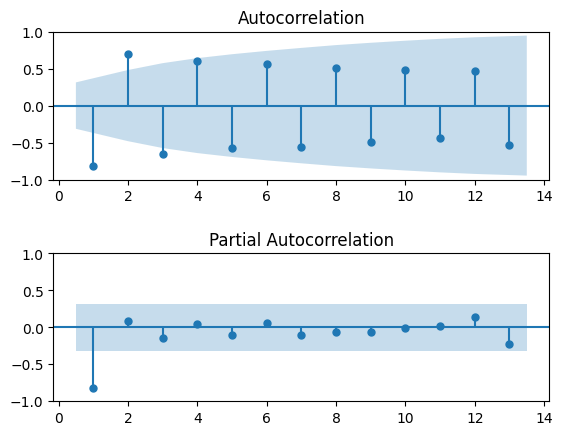

In [ ]:
#Check runs test again and plot ACF and PACF
_, pval_runs = runstest_1samp(data_std['diff1'][1:], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data_std['diff1'][1:], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data_std['diff1'][1:], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

Shapiro-Wilk test p-value = 0.110


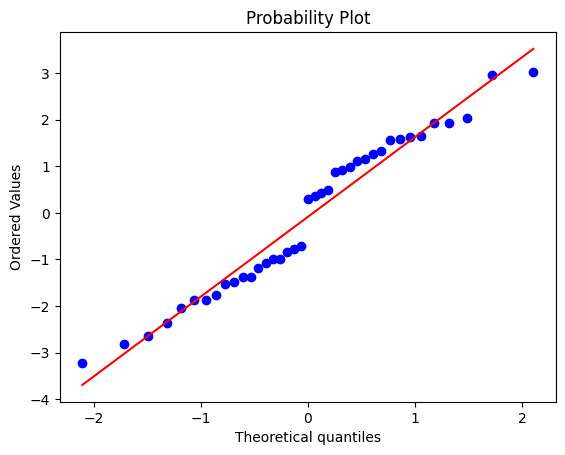

In [ ]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data_std['diff1'][1:])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data_std['diff1'][1:], dist="norm", plot=plt)
plt.show()

In [ ]:
#ARIMA model (1,1,1) import the necessary library
!pip install qda
import qda
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

x = data['Perimeter [pixels]']
model = qda.ARIMA(x, order=(1,1,1), add_constant=True)

qda.ARIMAsummary(model)

ModuleNotFoundError: No module named 'qda'

In [ ]:
#ARIMA(2,1,1) with the constant
x = data['Perimeter [pixels]']
model = qda.ARIMA(x, order=(2,1,1), add_constant=True)

qda.ARIMAsummary(model)


NameError: name 'qda' is not defined

In [ ]:
#ARIMA(2,1,1) without the constant
x = data['Perimeter [pixels]']
model = qda.ARIMA(x, order=(2,1,1), add_constant=False)

qda.ARIMAsummary(model)

NameError: name 'qda' is not defined

In [ ]:
#Extract the residuals
residuals_perimeter = model.resid[1:]

# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals_perimeter)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(residuals_perimeter, dist="norm", plot=plt)
plt.show()

NameError: name 'model' is not defined

In [ ]:
data_out_perimeter = residuals_perimeter.drop(index=1)

_, p_value_SW = stats.shapiro(data_out_perimeter)
print("p-value of the Shapiro Wilk test is %.3f\n" %(p_value_SW))

stats.probplot(data_out_perimeter, dist="norm", plot=plt)
plt.show()

NameError: name 'residuals_perimeter' is not defined

In [ ]:
#Data are normal as p value higher than 5%

In [ ]:
Residuals_perimeter = data_out_perimeter
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(Residuals_perimeter, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(Residuals_perimeter, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

NameError: name 'data_out_perimeter' is not defined

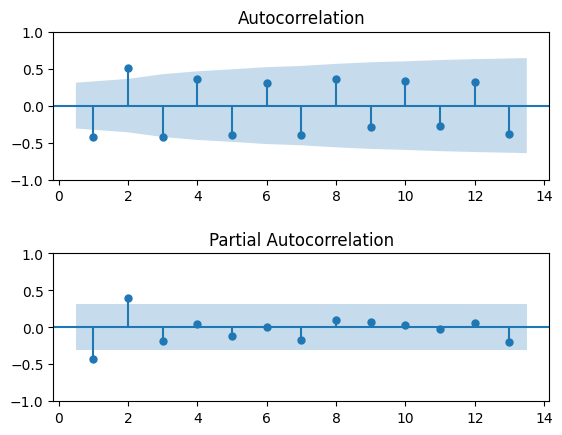

In [ ]:
#Check ACF and PACF of Area
import statsmodels.graphics.tsaplots as sgt
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data_std['Area [pixels]'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data_std['Area [pixels]'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

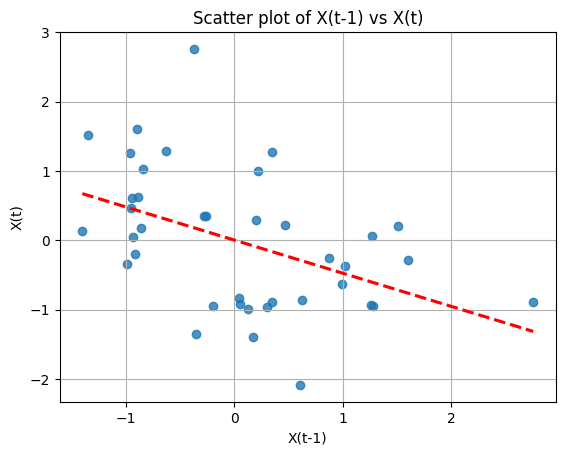

In [ ]:
#Apply difference operator
data_std['lag1'] = data_std['Area [pixels]'].shift(1)
sns.regplot(x=data_std['lag1'], y=data_std['Area [pixels]'], ci=None, line_kws={'color':'red', 'ls':'--'})
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.xlabel('X(t-1)')
plt.ylabel('X(t)')
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.grid()

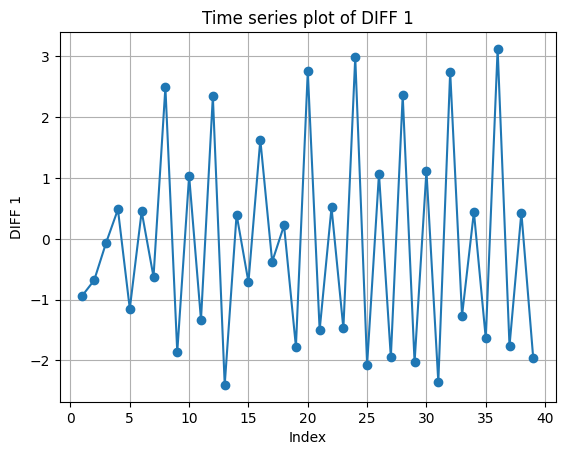

In [ ]:
#calculate the difference between the data and the lag1
data_std['diff1'] = data_std['Area [pixels]'] - data_std['lag1']
plt.plot(data_std['diff1'], 'o-')
plt.xlabel('Index')
plt.ylabel('DIFF 1')
plt.title('Time series plot of DIFF 1')
plt.grid()
plt.show()

Runs test p-value = 0.000


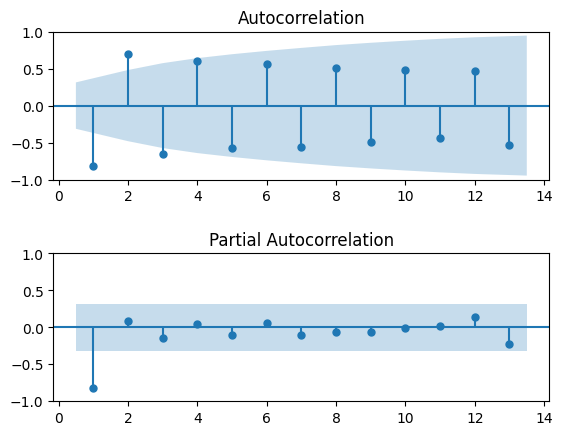

In [ ]:
#Check runs test again
_, pval_runs = runstest_1samp(data_std['diff1'][1:], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

#Plot ACF and PACF
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data_std['diff1'][1:], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data_std['diff1'][1:], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

n = len(data_std['diff1'][1:])

#autocorrelation function
[acf_values, lbq, _] = acf(data_std['diff1'][1:], nlags = int(np.sqrt(n)), qstat=True, fft = False)

#Bartlett's test at lag 1
alpha = 0.05
lag_test = 1
rk = acf_values[lag_test]
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(n)))

Test statistic rk = -0.822012
Rejection region starts at 0.313845


Shapiro-Wilk test p-value = 0.110


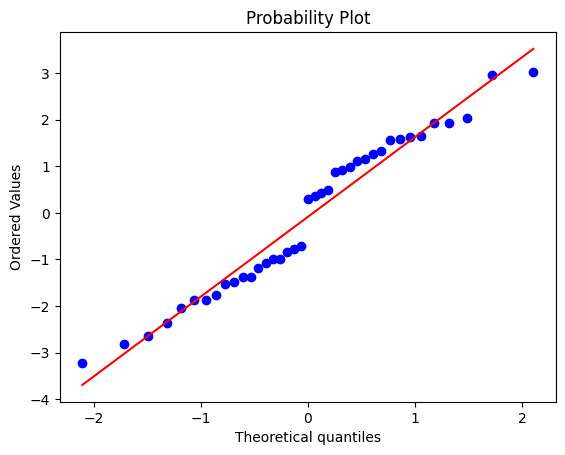

In [ ]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data_std['diff1'][1:])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data_std['diff1'][1:], dist="norm", plot=plt)
plt.show()

In [ ]:
#ARIMA model (1,1,1) import the necessary library
!pip install qda
import qda
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

x = data['Area [pixels]']
model = qda.ARIMA(x, order=(1,1,1), add_constant=True)

qda.ARIMAsummary(model)

ModuleNotFoundError: No module named 'qda'

In [ ]:
#ARIMA model (1,1,1) without the constant

x = data['Area [pixels]']
model = qda.ARIMA(x, order=(1,1,1), add_constant=False)

qda.ARIMAsummary(model)

NameError: name 'qda' is not defined

In [ ]:
#Extract the residuals
residuals_area = model.resid[1:]

# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals_area)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(residuals_area, dist="norm", plot=plt)
plt.show()

NameError: name 'model' is not defined

In [ ]:
#Remove outliers and check normality again
data_out_area = residuals_area.drop(index=2)

#Shapiro-Wilk test
from scipy.stats import shapiro
stat_shapiro_out, p_shapiro_out = shapiro(data_out_area)
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro_out, p_shapiro_out))

#Interpretation
alpha = 0.05
if p_shapiro_out > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')

#Plot the qqplot
stats.probplot(data_out_area, dist="norm", plot=plt)
plt.show()

NameError: name 'residuals_area' is not defined

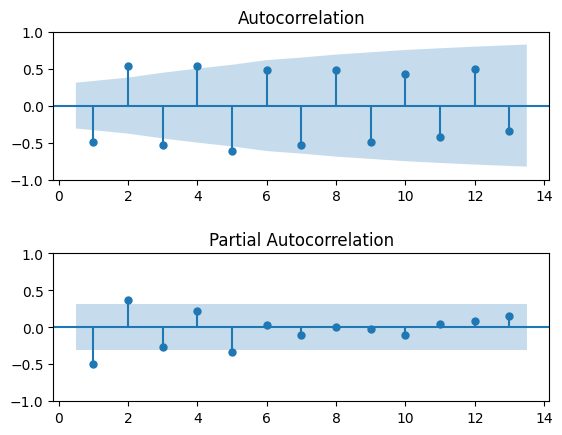

In [ ]:
#Check ACF and PACF of SOLIDITY
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data_std['Solidity'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data_std['Solidity'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

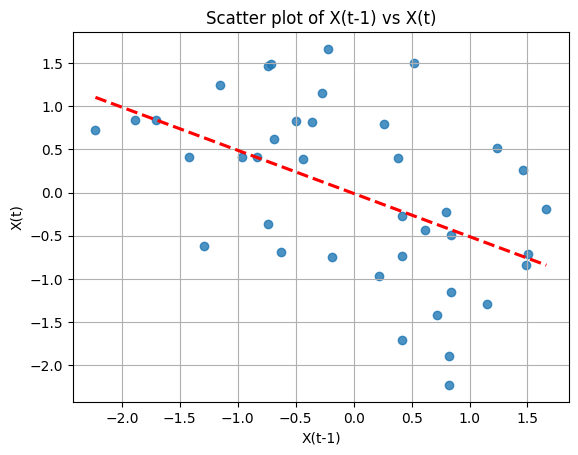

In [ ]:
#As data are non stationary, apply the differeintial operator
data_std['lag1'] = data_std['Solidity'].shift(1)
sns.regplot(x=data_std['lag1'], y=data_std['Solidity'], ci=None, line_kws={'color':'red', 'ls':'--'})
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.xlabel('X(t-1)')
plt.ylabel('X(t)')
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.grid()

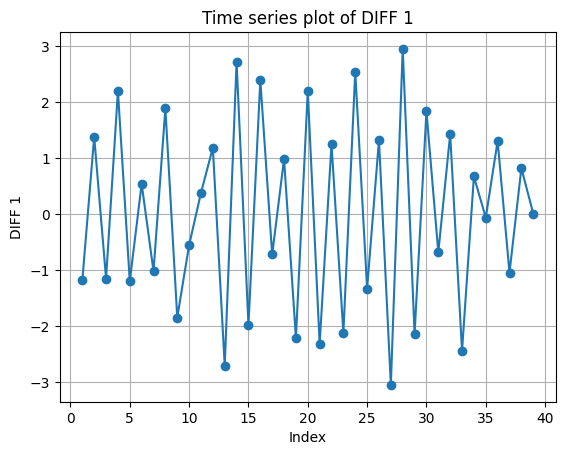

In [ ]:
data_std['diff1'] = data_std['Solidity'] - data_std['lag1']
plt.plot(data_std['diff1'], 'o-')
plt.xlabel('Index')
plt.ylabel('DIFF 1')
plt.title('Time series plot of DIFF 1')
plt.grid()
plt.show()

Runs test p-value = 0.000


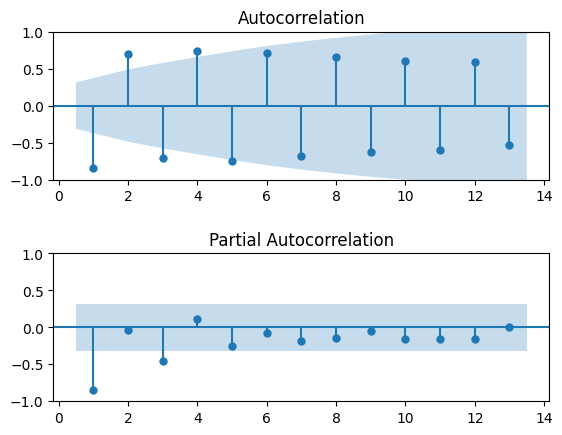

In [ ]:
#Runs test as well as ACF and PACF
_, pval_runs = runstest_1samp(data_std['diff1'][1:], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data_std['diff1'][1:], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data_std['diff1'][1:], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

In [ ]:
#Test lag 1
n = len(data_std['diff1'][1:])

#autocorrelation function
[acf_values, lbq, _] = acf(data_std['diff1'][1:], nlags = int(np.sqrt(n)), qstat=True, fft = False)

#Bartlett's test at lag 1
alpha = 0.05
lag_test = 1
rk = acf_values[lag_test]
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(n)))

if rk>z_alpha2/np.sqrt(n):
    print('The null hypothesis is rejected')
else: print('The null hypothesis is accepted')

Test statistic rk = -0.842437
Rejection region starts at 0.313845
The null hypothesis is accepted


Shapiro-Wilk test p-value = 0.075


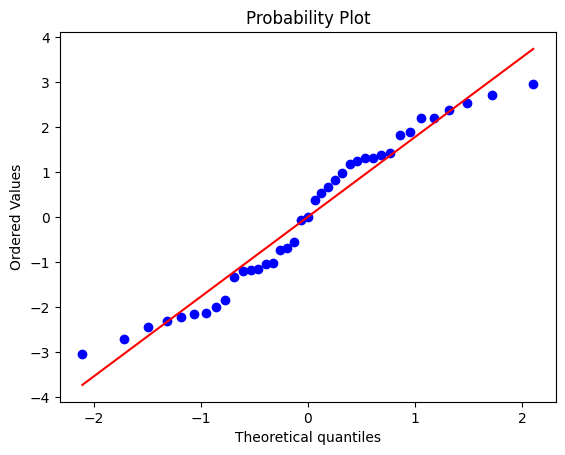

In [ ]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data_std['diff1'][1:])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data_std['diff1'][1:], dist="norm", plot=plt)
plt.show()

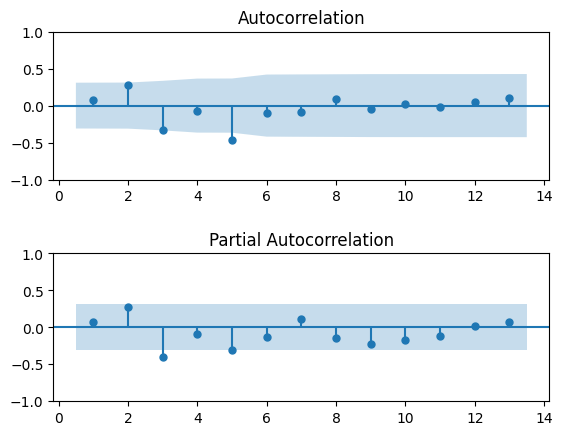

In [ ]:
#Check ACF and PACF of Extent
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data_std['Extent'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data_std['Extent'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

In [ ]:
#Test lag 3
n = len(data_std['Extent'])

#autocorrelation function
[acf_values, lbq, _] = acf(data_std['Extent'], nlags = int(np.sqrt(n)), qstat=True, fft = False)

#Bartlett's test at lag 3
alpha = 0.05
lag_test = 3
rk = acf_values[lag_test]
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(n)))

if rk>z_alpha2/np.sqrt(n):
    print('The null hypothesis is rejected')
else: print('The null hypothesis is accepted')

Test statistic rk = -0.332202
Rejection region starts at 0.309898
The null hypothesis is accepted


Shapiro-Wilk test p-value = 0.218


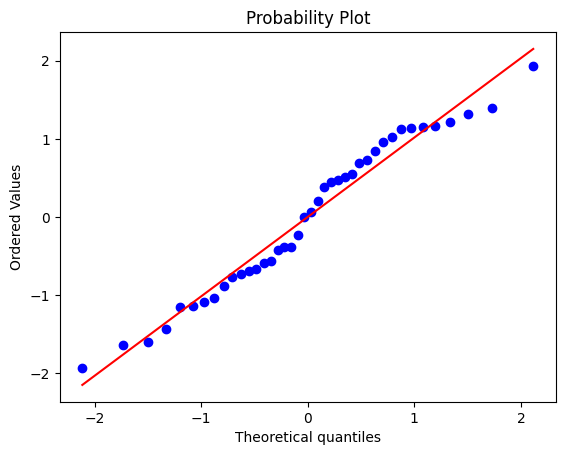

In [ ]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data_std['Extent'])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data_std['Extent'], dist="norm", plot=plt)
plt.show()

Statistic = 0.965, p-val = 0.266
Fail to reject H0


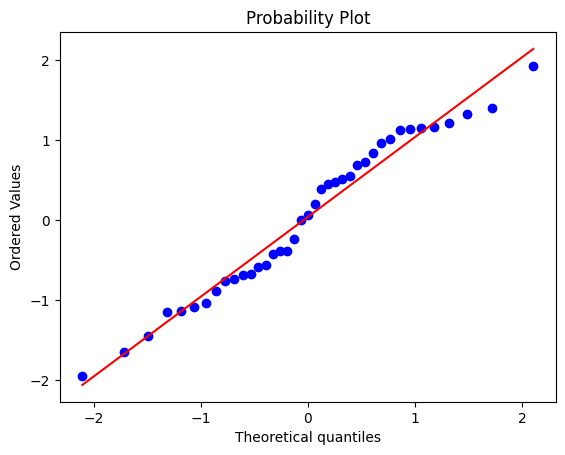

In [ ]:
# Remove outliers and check normality
data_out_extent = data_std['Extent'].drop(index=27)

#Shapiro-Wilk test
from scipy.stats import shapiro
stat_shapiro_out, p_shapiro_out = shapiro(data_out_extent)
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro_out, p_shapiro_out))

# interpret
alpha = 0.05
if p_shapiro_out > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')

# Plot the qqplot
stats.probplot(data_out_extent, dist="norm", plot=plt)
plt.show()

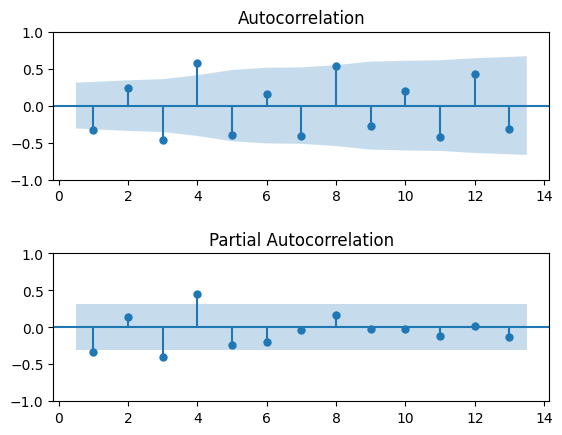

In [ ]:
#Check ACF and PACF of Major Axis Length [pixels]
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data_std['Major Axis Length [pixels]'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data_std['Major Axis Length [pixels]'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

In [ ]:
#Test lag 4
n = len(data_std['Major Axis Length [pixels]'])

#autocorrelation function
[acf_values, lbq, _] = acf(data_std['Major Axis Length [pixels]'], nlags = int(np.sqrt(n)), qstat=True, fft = False)

#Bartlett's test at lag 4
alpha = 0.05
lag_test = 4
rk = acf_values[lag_test]
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(n)))

if rk>z_alpha2/np.sqrt(n):
    print('The null hypothesis is rejected')
else: print('The null hypothesis is accepted')

Test statistic rk = 0.238810
Rejection region starts at 0.309898
The null hypothesis is accepted


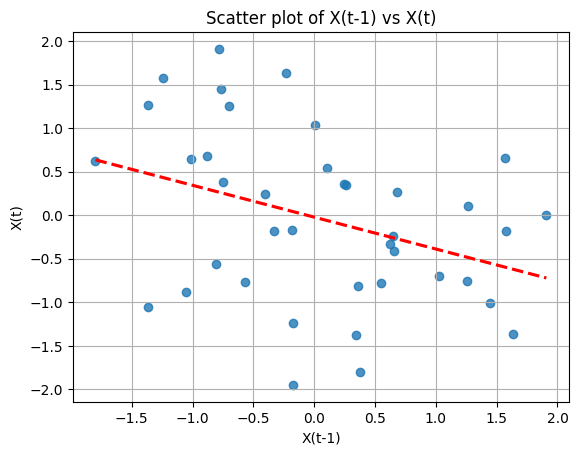

In [ ]:
#Apply difference operator
data_std['lag1'] = data_std['Major Axis Length [pixels]'].shift(1)
sns.regplot(x=data_std['lag1'], y=data_std['Major Axis Length [pixels]'], ci=None, line_kws={'color':'red', 'ls':'--'})
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.xlabel('X(t-1)')
plt.ylabel('X(t)')
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.grid()

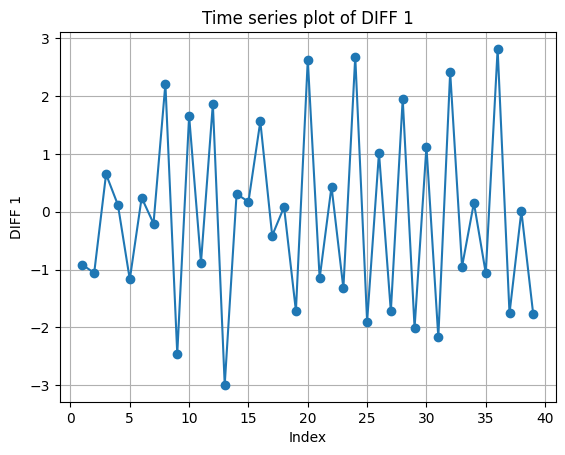

In [ ]:
#calculate the difference between the data and lag1
data_std['diff1'] = data_std['Major Axis Length [pixels]'] - data_std['lag1']
plt.plot(data_std['diff1'], 'o-')
plt.xlabel('Index')
plt.ylabel('DIFF 1')
plt.title('Time series plot of DIFF 1')
plt.grid()
plt.show()

Runs test p-value = 0.000


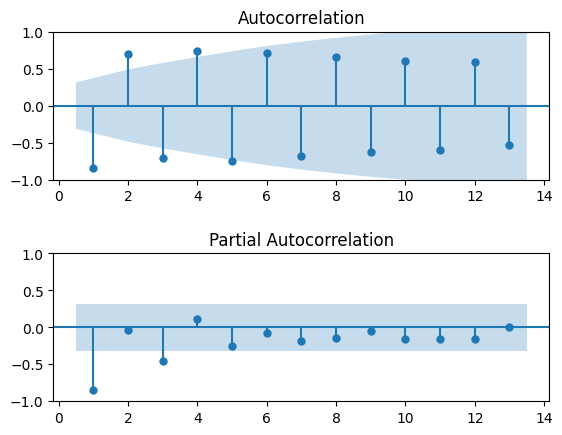

In [ ]:
#Check runs test again and also plot ACF and PACF
_, pval_runs = runstest_1samp(data_std['diff1'][1:], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data_std['diff1'][1:], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data_std['diff1'][1:], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

Shapiro-Wilk test p-value = 0.075


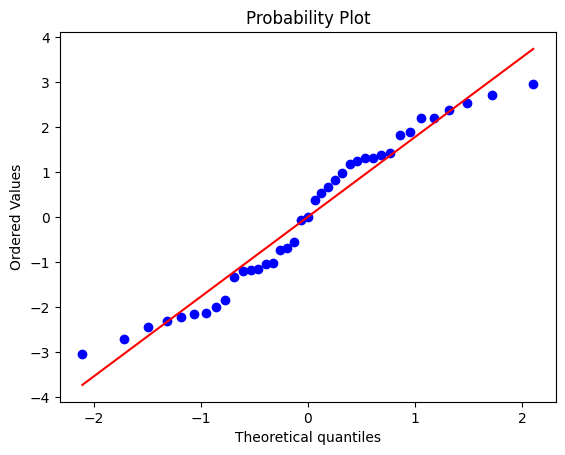

In [ ]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data_std['diff1'][1:])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data_std['diff1'][1:], dist="norm", plot=plt)
plt.show()

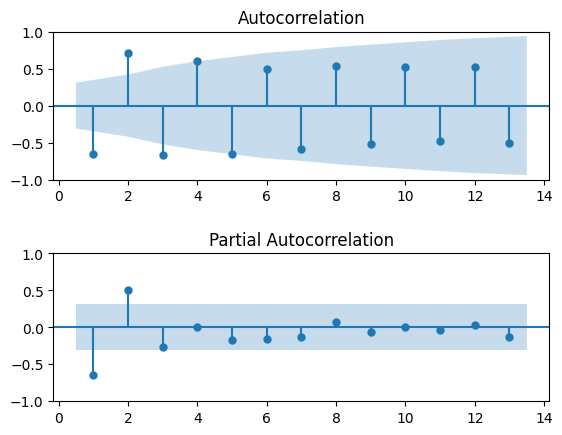

In [ ]:
#Check ACF and PACF of Minor Axis Length
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data_std['Minor Axis Length [pixels]'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data_std['Minor Axis Length [pixels]'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

In [ ]:
#Test lag 5
n = len(data_std['Minor Axis Length [pixels]'])

#autocorrelation function
[acf_values, lbq, _] = acf(data_std['Minor Axis Length [pixels]'], nlags = int(np.sqrt(n)), qstat=True, fft = False)

#Bartlett's test at lag 5
alpha = 0.05
lag_test = 5
rk = acf_values[lag_test]
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(n)))

if rk>z_alpha2/np.sqrt(n):
    print('The null hypothesis is rejected')
else: print('The null hypothesis is accepted')

Test statistic rk = -0.576185
Rejection region starts at 0.309898
The null hypothesis is accepted


Shapiro-Wilk test p-value = 0.093


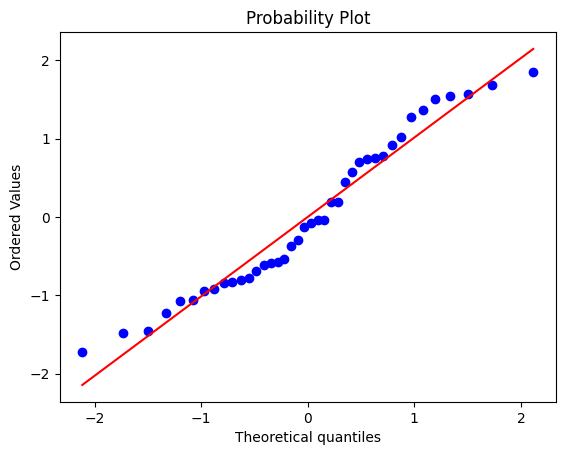

In [ ]:
# Check the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data_std['Minor Axis Length [pixels]'])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data_std['Minor Axis Length [pixels]'], dist="norm", plot=plt)
plt.show()

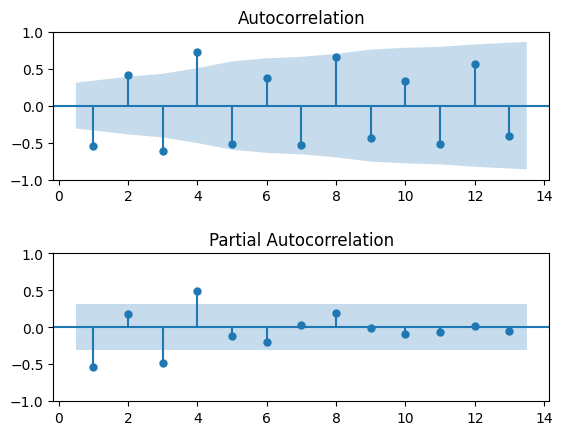

In [ ]:
#Check ACF and PACF of Equivalent Diameter [pixels]
import statsmodels.graphics.tsaplots as sgt
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data_std['Equivalent Diameter [pixels]'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data_std['Equivalent Diameter [pixels]'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

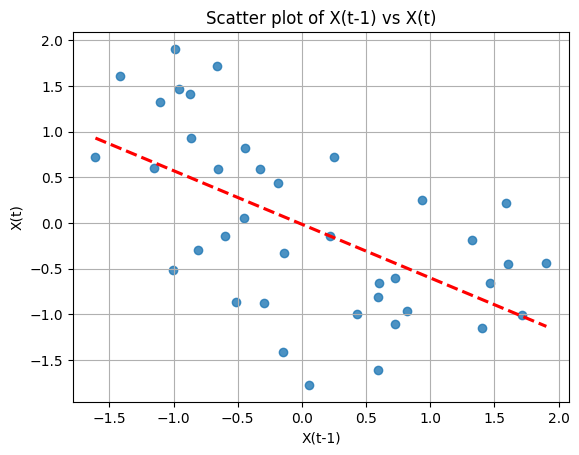

In [ ]:
#Apply difference operator
data_std['lag1'] = data_std['Equivalent Diameter [pixels]'].shift(1)
sns.regplot(x=data_std['lag1'], y=data_std['Equivalent Diameter [pixels]'], ci=None, line_kws={'color':'red', 'ls':'--'})
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.xlabel('X(t-1)')
plt.ylabel('X(t)')
plt.title('Scatter plot of X(t-1) vs X(t)')
plt.grid()

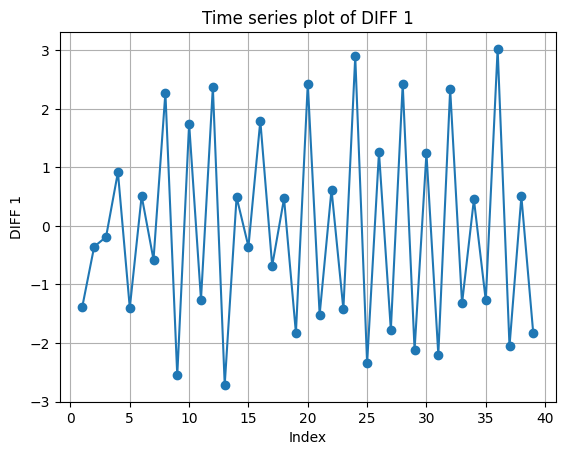

In [ ]:
#Calculate the difference between the data and lag1
data_std['diff1'] = data_std['Equivalent Diameter [pixels]'] - data_std['lag1']
plt.plot(data_std['diff1'], 'o-')
plt.xlabel('Index')
plt.ylabel('DIFF 1')
plt.title('Time series plot of DIFF 1')
plt.grid()
plt.show()

Runs test p-value = 0.000


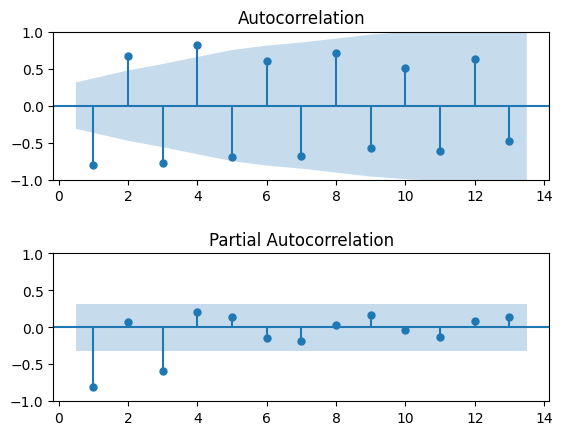

In [ ]:
#Check runs test again and also plot ACF and PACF
_, pval_runs = runstest_1samp(data_std['diff1'][1:], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data_std['diff1'][1:], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data_std['diff1'][1:], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

In [ ]:
#Test lag 1
n = len(data_std['diff1'][1:])

#autocorrelation function
[acf_values, lbq, _] = acf(data_std['diff1'][1:], nlags = int(np.sqrt(n)), qstat=True, fft = False)

#Bartlett's test at lag 1
alpha = 0.05
lag_test = 1
rk = acf_values[lag_test]
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(n)))

if rk>z_alpha2/np.sqrt(n):
    print('The null hypothesis is rejected')
else: print('The null hypothesis is accepted')

NameError: name 'data_std' is not defined